In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
rectangles = np.genfromtxt('sample_data.csv', delimiter=',')
max_width = rectangles[:,2].max()
max_height = rectangles[:,3].max()

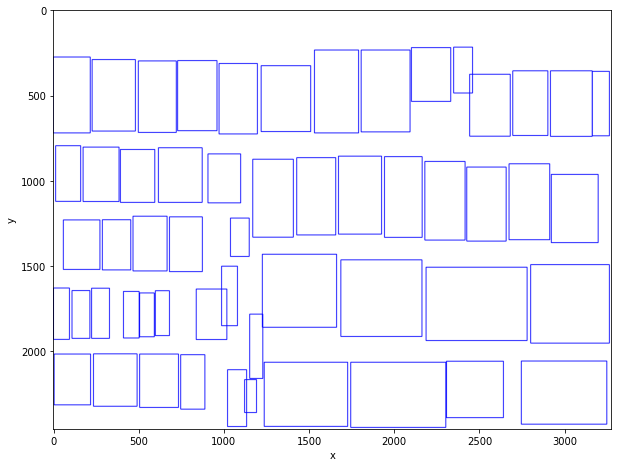

In [16]:
blank = 255*np.ones(shape=[int(max_height+10), int(max_width+10), 3], dtype=np.uint8)

for rec in rectangles:

    c1 = tuple(map(int, rec[0:2]))
    c2 = tuple(map(int, rec[2:4]))

    cv2.rectangle(blank, pt1 = c1, pt2 = c2, color=(0,0,255), thickness=3)


plt.figure(figsize = (10,10))
plt.imshow(blank)
plt.xlabel('x')
plt.ylabel('y');